### Bharat Intern: Stock price prediction Using LSTM Internship project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
#Downloading Apple Stock price data from 1st January 2010 till 30th August 2023
start_date = '2010-01-01'
end_date = '2023-08-30'
data = yf.download('AAPL', start=start_date, end=end_date)
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


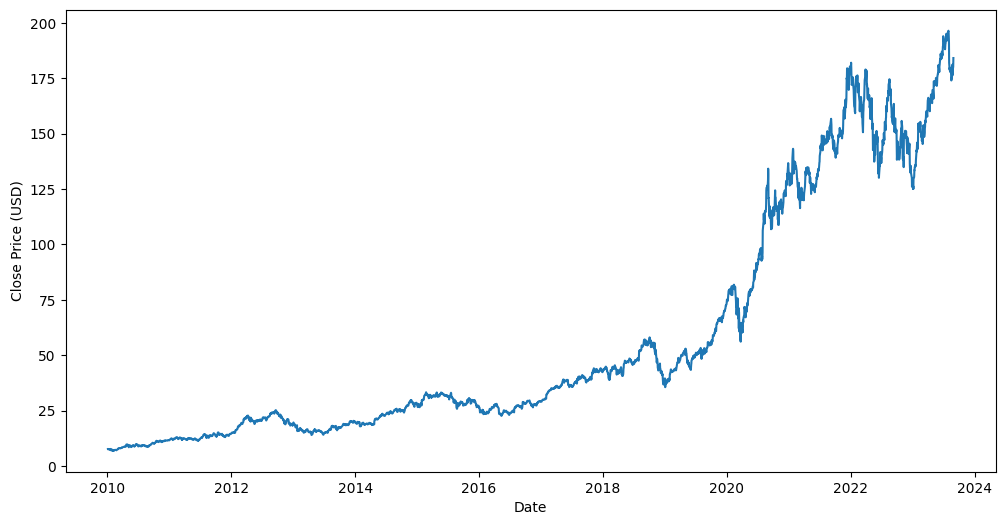

In [3]:
#plotting stock price data.

plt.figure(figsize=(12, 6))
#plt.title(f'{AAPL} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data['Close'])
plt.show()

In [4]:
# Data preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Creating Input Sequences and Target Values
sequence_length = 60  # You can adjust this window size
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])

# Data Splitting
X, y = np.array(X), np.array(y)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Model Building
model = Sequential()
model.add(layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(layers.LSTM(units=50, return_sequences=False))
model.add(layers.Dense(units=25))
model.add(layers.Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
model.fit(X_train, y_train, batch_size=64, epochs=50)

# Model Evaluation
test_loss = model.evaluate(X_test, y_test)

Epoch 1/50
43/43 [==============================] - 12s 140ms/step - loss: 0.0043
Epoch 2/50
43/43 [==============================] - 6s 132ms/step - loss: 1.3441e-04
Epoch 3/50
43/43 [==============================] - 6s 142ms/step - loss: 1.0752e-04
Epoch 4/50
43/43 [==============================] - 6s 141ms/step - loss: 1.0639e-04
Epoch 5/50
43/43 [==============================] - 6s 142ms/step - loss: 1.0756e-04
Epoch 6/50
43/43 [==============================] - 6s 150ms/step - loss: 9.7564e-05
Epoch 7/50
43/43 [==============================] - 6s 149ms/step - loss: 1.0133e-04
Epoch 8/50
43/43 [==============================] - 6s 140ms/step - loss: 9.4399e-05
Epoch 9/50
43/43 [==============================] - 4s 99ms/step - loss: 9.0400e-05
Epoch 10/50
43/43 [==============================] - 3s 59ms/step - loss: 8.5156e-05
Epoch 11/50
43/43 [==============================] - 3s 60ms/step - loss: 1.2291e-04
Epoch 12/50
43/43 [==============================] - 3s 58ms/step - l

In [5]:
print(f'Test Loss: {test_loss:.4f}')

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Test Loss: 0.0004


22/22 [==============================] - 1s 11ms/step


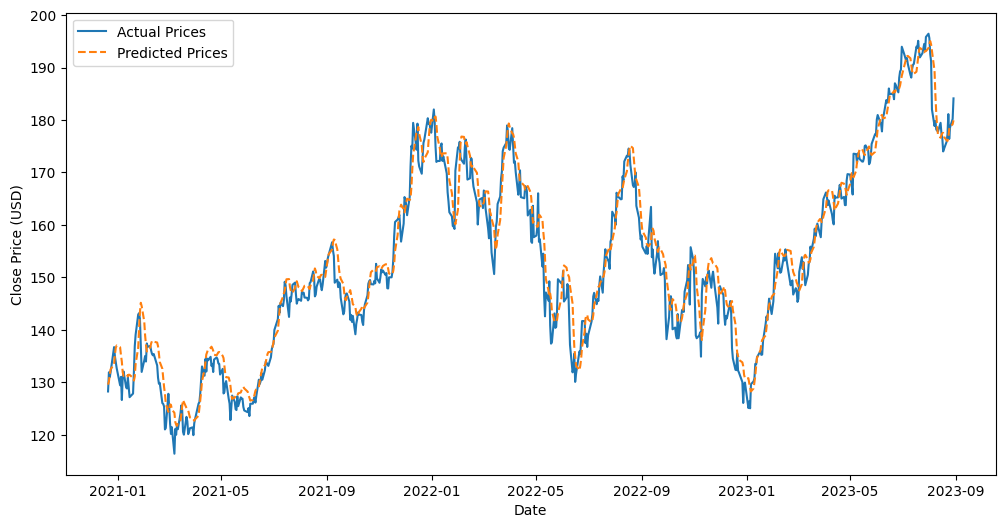

In [6]:
# Plotting Actual and Predicted Stock Prices

plt.figure(figsize=(12, 6))
#plt.title(f'{AAPL} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(data.index[-len(predictions):], data['Close'].values[-len(predictions):], label='Actual Prices')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Prices', linestyle='--')
plt.legend()
plt.show()